In [11]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)


In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris['data'][:,2:]
y = iris['target']
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(
                clf,
                out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
                )

<img src='img/501.jpg'>

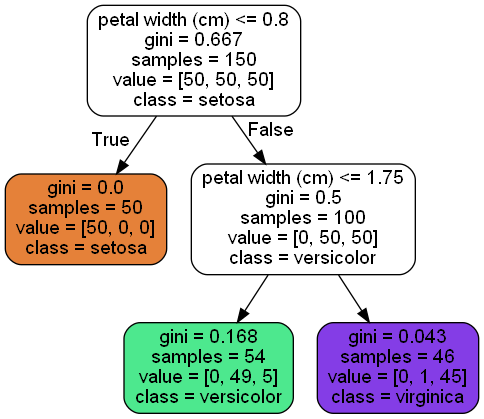

In [16]:
from IPython.display import Image
Image(filename='iris_tree.png', width=450,height=400)

<img src='img/502.jpg'>

### 决策边界展示

Text(0.5, 1.0, 'Decision Tree decision boundaries')

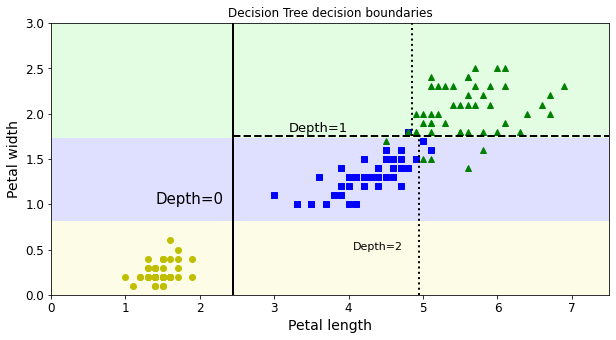

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf,X,y,axes=[0,7.5,0,3],iris=True,legend=False,plot_training=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1 , x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.3)
    if not iris:
        custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap,alpha=0.8)
    
    if plot_training:
        plt.plot(X[:,0][y==0],X[y==0,1],'yo',label='Iris-Setosa')
        plt.plot(X[y==1,0],X[y==1,1],'bs',label='Iris-Versicolour')
        plt.plot(X[y==2,0],X[y==2,1],'g^',label='Iris-Virginica')
        plt.axis(axes)
    
    if iris:
        plt.xlabel('Petal length', fontsize = 14)
        plt.ylabel('Petal width', fontsize = 14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18,rotation=0)
    
    if legend:
        plt.legend(loc='lower right', fontsize=14)
    
plt.figure(figsize=(10,5))
plot_decision_boundaries(clf,X,y)
plt.plot([2.45,2.45],[0,3],'k-',linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75],'k--',linewidth=2)
plt.plot([4.95,4.95],[0,1.75],'k:',linewidth=2)
plt.plot([4.85,4.85],[1.75,3],'k:',linewidth=2)
plt.text(1.4,1.0,'Depth=0',fontsize=15)
plt.text(3.2,1.8,'Depth=1',fontsize=13)
plt.text(4.05,0.5,'Depth=2',fontsize=11)
plt.title('Decision Tree decision boundaries')

<img src='img/502.jpg'>

In [23]:
np.array([5,1.5]).reshape(1, -1)

array([[5. , 1.5]])

In [24]:
clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [25]:
clf.predict([[5,1.5]])

array([1])

<img src='img/503.jpg'> 

Text(0.5, 1.0, 'min_samples_leaf')

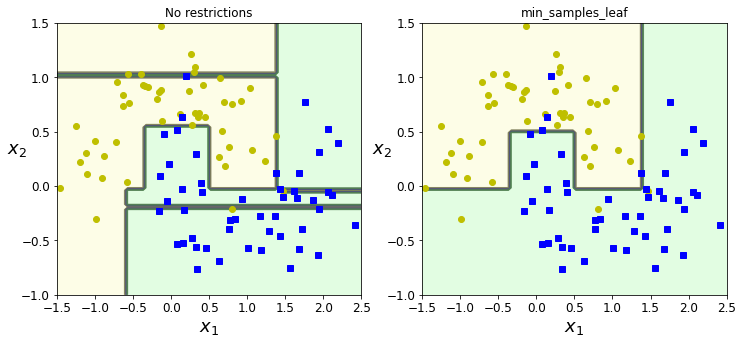

In [26]:
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=100, noise=0.25,random_state=42)
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
clf1.fit(X,y)
clf2.fit(X,y)

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_decision_boundaries(clf1,X,y,axes=[-1.5,2.5,-1,1.5],iris=False)
plt.title('No restrictions')

plt.subplot(122)
plot_decision_boundaries(clf2,X,y,axes=[-1.5,2.5,-1,1.5],iris=False)
plt.title('min_samples_leaf')

In [33]:
np.random.seed(6)
Xs = np.random.rand(100,2)-0.5
ys = (Xs[:,0]>0).astype(np.float32)*2
ys

array([2., 2., 0., 2., 0., 0., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 0.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 2., 2., 2., 0.,
       2., 0., 0., 2., 0., 0., 0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2.,
       0., 0., 0., 2., 2., 2., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 2., 0., 2., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2.,
       0., 2., 0., 0., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0., 2.],
      dtype=float32)

#### 矩阵旋转

In [34]:
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
rotation_matrix

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [35]:
np.sqrt(2)/2

0.7071067811865476

In [38]:
Xsr = Xs.dot(rotation_matrix)

### 决策树对数据的敏感

Text(0.5, 1.0, 'Sensitivity to training set rotation')

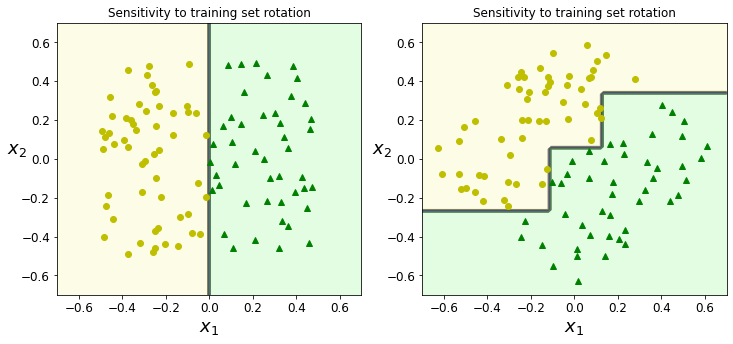

In [39]:
clf_s = DecisionTreeClassifier(random_state=42)
clf_sr = DecisionTreeClassifier(random_state=42)
clf_s.fit(Xs,ys)
clf_sr.fit(Xsr,ys)

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_decision_boundaries(clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.title('Sensitivity to training set rotation')

plt.subplot(122)
plot_decision_boundaries(clf_sr,Xsr,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.title('Sensitivity to training set rotation')